#                        **Project proposal to predict credit card approval**

**INTRODUCTION :**


The credit card system has been widely used to boost the global economy towards an extraordinary growth. Giving credit cards to the high-risk customers, on the other hand could lead to financial crisis. 
Manually assessing the credit card applications is time-consuming, tedious, and error-prone. Hence a data-driven system and hence a model is created to predict the eligibility of each customer to get credit card benefits.
The main goal of creating a Credit Card Approval model is to demonstrate the impact of many factors like gender, income, number of years employed, and so on on credit card approval.


**METHOD:** 

First, the dataset is loaded which contain a mixture of both numerical and non-numerical features. It may also contain a number of missing entries. Hence we will have to preprocess the dataset to ensure that the machine learning model we choose can make good predictions. After our dataset is in good shape, we will do the exploratory data analysis to build our intuitions. Finally, we will build a machine learning model that can predict if an individual's application for a credit card will be accepted. 

**DATA DESCRIPION:** 

Ind_ID: Client ID

Gender: Gender information

Car_owner: Having car or not

Propert_owner: Having property or not

Children: Count of children

Annual_income: Annual income

Type_Income: Income type

Education: Education level

Marital_status: Marital_status

Housing_type: Living style

Birthday_count: Use backward count from current day (0), -1 means yesterday.

Employed_days: Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.

Mobile_phone: Any mobile phone

Work_phone: Any work phone

Phone: Any phone number

EMAIL_ID: Any email ID

Type_Occupation: Occupation

Family_Members: Family size

**Label: 0 is application approved and 1 is application rejected.**

In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#Load dataset
df = pd.read_csv("credit_card_data.csv")

In [ ]:
#Inspect the data
df.head(5)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GENDER          1548 non-null   int64  
 1   Car_Owner       1548 non-null   int64  
 2   Propert_Owner   1548 non-null   int64  
 3   CHILDREN        1548 non-null   int64  
 4   Annual_income   1548 non-null   float64
 5   Type_Income     1548 non-null   int64  
 6   EDUCATION       1548 non-null   int64  
 7   Marital_status  1548 non-null   int64  
 8   Housing_type    1548 non-null   int64  
 9   Birthday_count  1548 non-null   float64
 10  Employed_days   1548 non-null   int64  
 11  Mobile_phone    1548 non-null   int64  
 12  Work_Phone      1548 non-null   int64  
 13  Phone           1548 non-null   int64  
 14  EMAIL_ID        1548 non-null   int64  
 15  Family_Members  1548 non-null   int64  
 16  label           1548 non-null   int64  
dtypes: float64(2), int64(15)
memory u

In [ ]:
# number of rows and columns
df.shape

(1548, 19)

In [ ]:
# getting some informations about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

Categorical Features: GENDER, Car_Owner, Propert_Owner, Type_Income, EDUCATION, Marital_status, Housing_type, Type_Occupation

In [ ]:
# checking for missing values
df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

<Axes: >

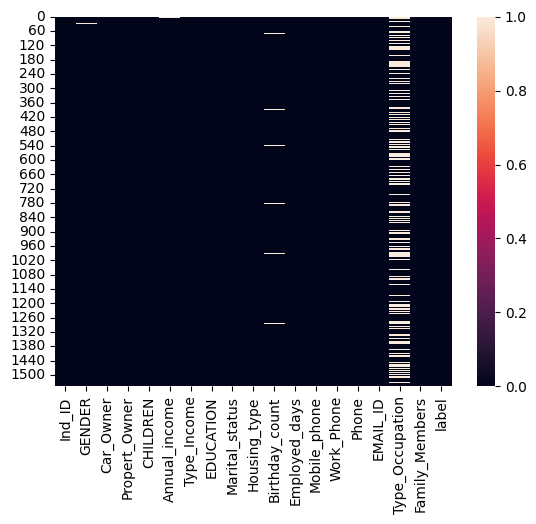

In [ ]:
# visualize null values
sns.heatmap(df.isna())

In [ ]:
# find the % of null values in Gender colunm
(df['GENDER'].isna().sum()/len(df['GENDER']))*100

0.45219638242894056

In [ ]:
# find the % of null values in Annual_income colunm
(df['Annual_income'].isna().sum()/len(df['Annual_income']))*100

1.4857881136950903

In [ ]:
# find the % of null values in Birthday_count colunm
(df['Birthday_count'].isna().sum()/len(df['Birthday_count']))*100

1.421188630490956

In [ ]:
# find the % of null values in Type_Occupation colunm
(df['Type_Occupation'].isna().sum()/len(df['Type_Occupation']))*100

31.52454780361757

In [ ]:
# We can see that the Type_Occupation column has a number of null values, as such we cannot use it for prediction. Hence we will drop it.
df.drop('Type_Occupation',axis=1,inplace=True)

In [ ]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1


<ipython-input-15-5e15965bbc49>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<function matplotlib.pyplot.show(close=None, block=None)>

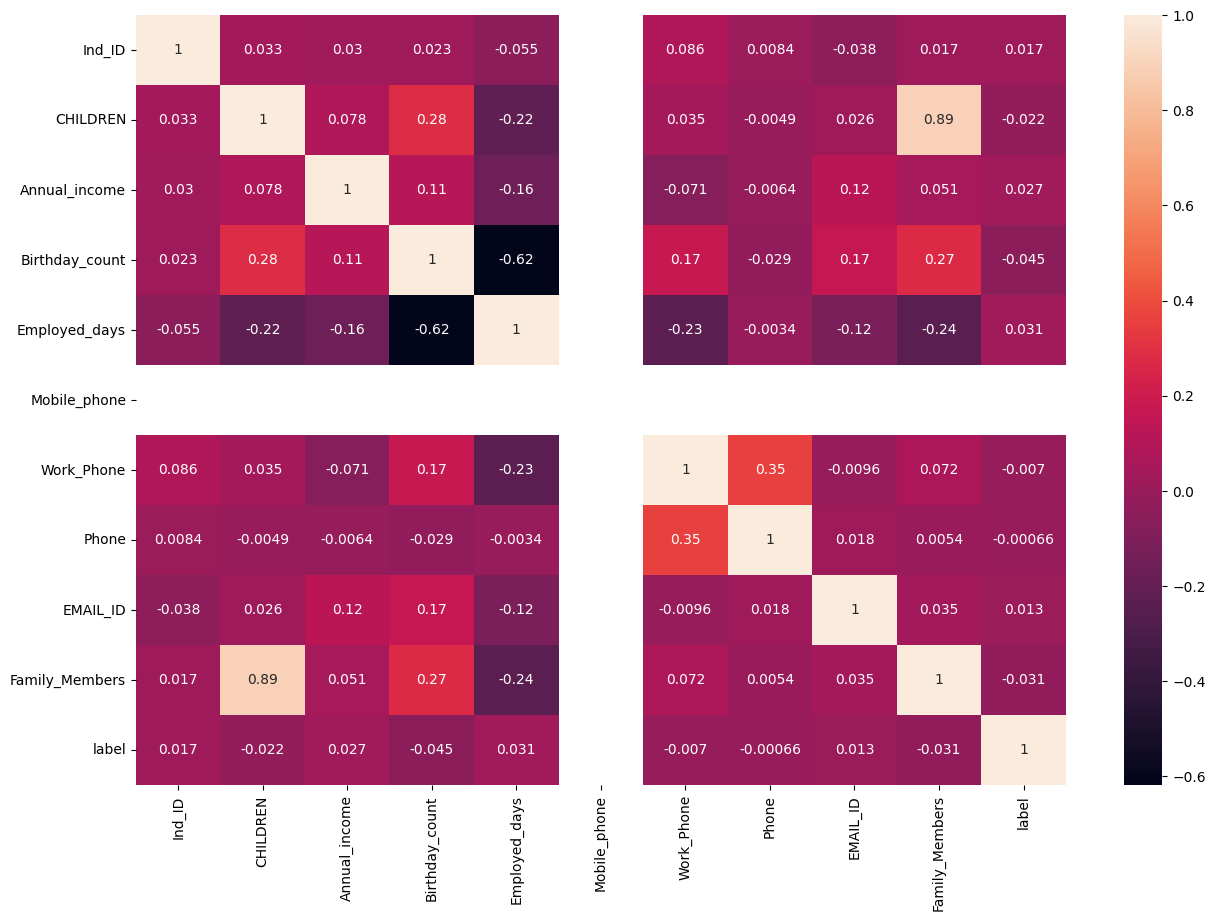

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.show

**Filling missing values**

In [ ]:
df['GENDER'].mode()

0    F
Name: GENDER, dtype: object

In [ ]:
# filling Gender column
df['GENDER'] =df['GENDER'].fillna(df['GENDER'].mode()[0])

In [ ]:
(df['GENDER'].isna().sum()/len(df['GENDER']))*100

0.0

In [ ]:
# filling Annual_income column
df['Annual_income'].fillna(df['Annual_income'].mean(),inplace=True)

In [ ]:
df['Annual_income'].isna().sum()

0

In [ ]:
# filling Birthday_count column
df['Birthday_count'].fillna(df['Birthday_count'].mean(),inplace=True)

In [ ]:
df['Birthday_count'].isna().sum()

0

In [ ]:
df.isnull().sum()

Ind_ID            0
GENDER            0
Car_Owner         0
Propert_Owner     0
CHILDREN          0
Annual_income     0
Type_Income       0
EDUCATION         0
Marital_status    0
Housing_type      0
Birthday_count    0
Employed_days     0
Mobile_phone      0
Work_Phone        0
Phone             0
EMAIL_ID          0
Family_Members    0
label             0
dtype: int64

In [ ]:
df.to_csv("CREDIT_DATA.csv")

**EXPLORATORY DATA ANALYSIS**

**GENDER**

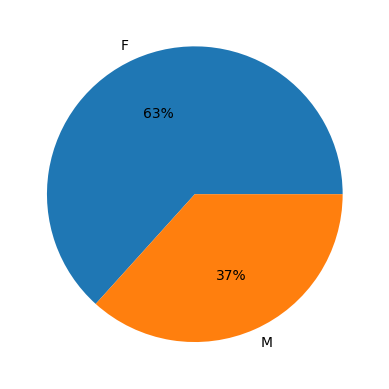

In [ ]:
plt.pie(df['GENDER'].value_counts(),autopct='%.f%%',labels=df['GENDER'].value_counts().index);

#Dominated by Females

**Car_Owner**

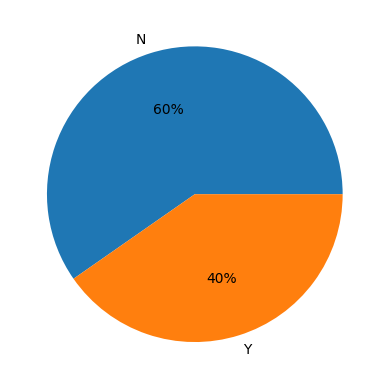

In [ ]:
plt.pie(df['Car_Owner'].value_counts(),autopct='%.f%%',labels=df['Car_Owner'].value_counts().index);

#Dominated by non car owners


**Propert_Owner**

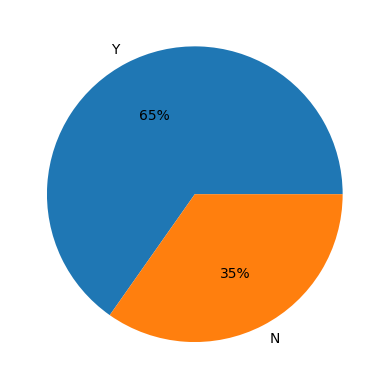

In [ ]:
plt.pie(df['Propert_Owner'].value_counts(),autopct='%.f%%',labels=df['Propert_Owner'].value_counts().index);

#Dominated by property owners

**CHILDREN**

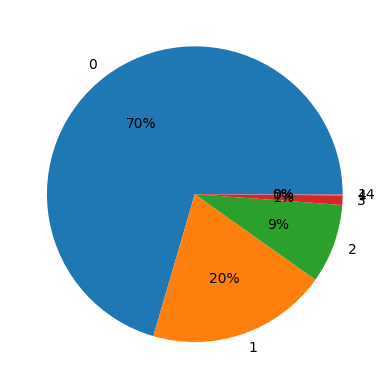

In [ ]:
plt.pie(df['CHILDREN'].value_counts(),autopct='%.f%%',labels=df['CHILDREN'].value_counts().index);

#Dominated by people with no kids

**Annual_income**

<Axes: >

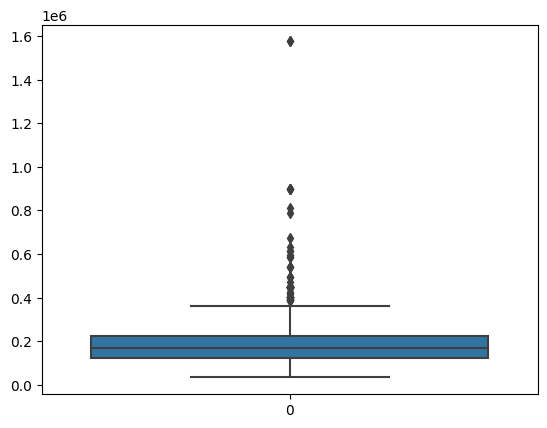

In [ ]:
sns.boxplot(df['Annual_income'])

**Type_Income**       

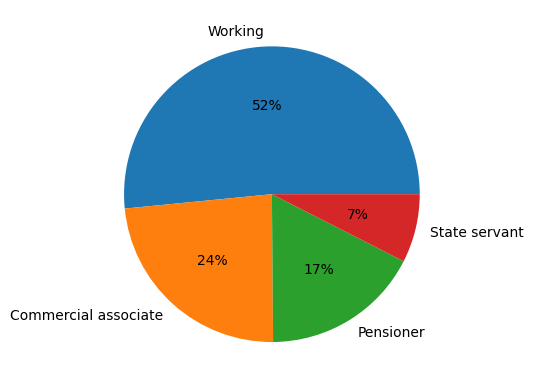

In [ ]:
plt.pie(df['Type_Income'].value_counts(),autopct='%.f%%',labels=df['Type_Income'].value_counts().index);

#Dominated by working people 

**EDUCATION**         

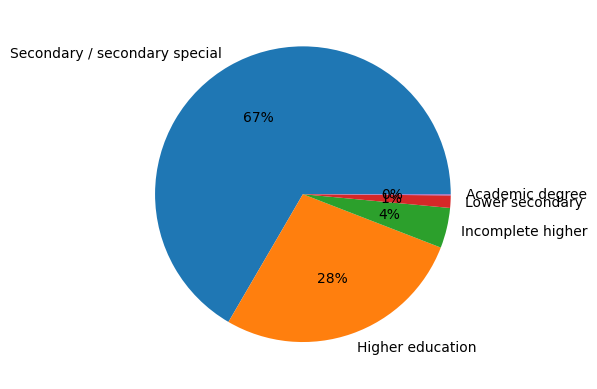

In [ ]:
plt.pie(df['EDUCATION'].value_counts(),autopct='%.f%%',labels=df['EDUCATION'].value_counts().index);

#Dominated by Secondary / secondary special

**Marital_status**

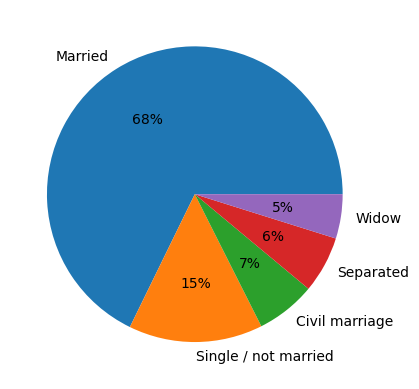

In [ ]:
plt.pie(df['Marital_status'].value_counts(),autopct='%.f%%',labels=df['Marital_status'].value_counts().index);

#Dominated by married

**Housing_type**

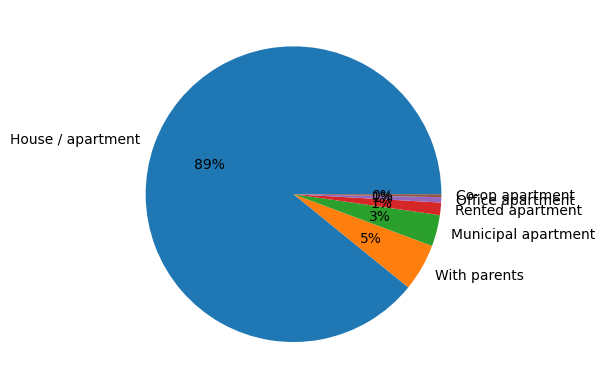

In [ ]:
plt.pie(df['Housing_type'].value_counts(),autopct='%.f%%',labels=df['Housing_type'].value_counts().index);

#Dominated by House / apartment

**Birthday_count**

<Axes: >

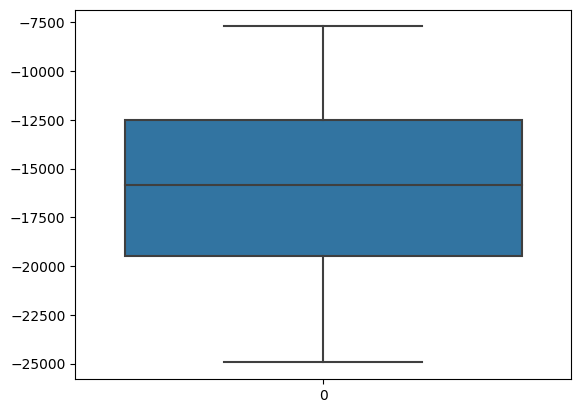

In [ ]:
sns.boxplot(df['Birthday_count'])

**Employed_days**

<Axes: >

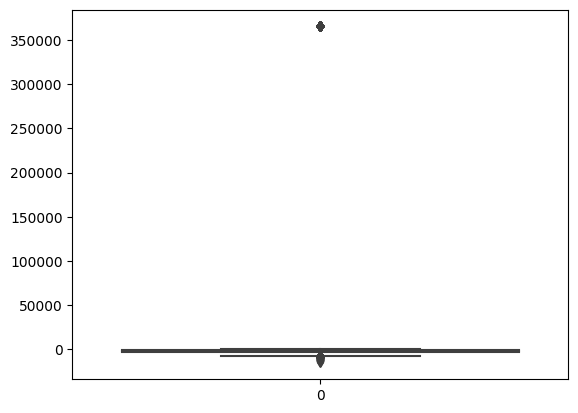

In [ ]:
sns.boxplot(df['Employed_days'])

**Family_Members**    

<Axes: >

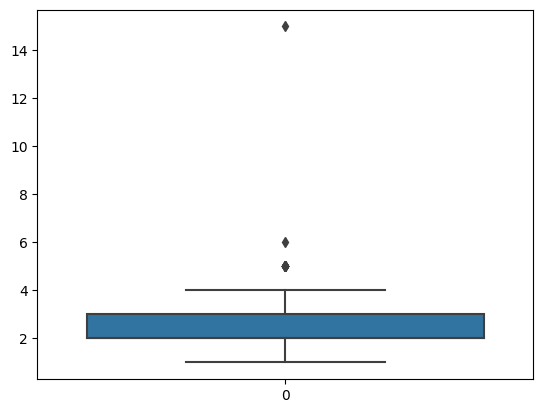

In [ ]:
sns.boxplot(df['Family_Members'])

**label**

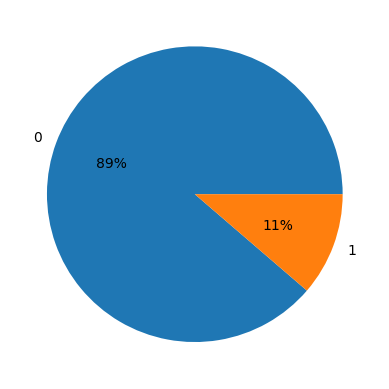

In [ ]:
plt.pie(df['label'].value_counts(),autopct='%.f%%',labels=df['label'].value_counts().index);

#Dominated by credit card approved cases

**Encoding the categorical features**

In [ ]:
# encoding gender column
df.replace({'GENDER':{'M':0,'F':1}}, inplace=True)

# encoding Car_Owner column
df.replace({'Car_Owner':{'Y':0,'N':1}}, inplace=True)

# encoding Propert_Owner column
df.replace({'Propert_Owner':{'Y':0,'N':1}}, inplace=True)




In [ ]:
# encoding Type_Income column
df.replace({'Type_Income':{'Working':0,'Commercial associate':1,'Pensioner':2,'State servant':3}}, inplace=True)

# encoding EDUCATION column
df.replace({'EDUCATION':{'Secondary / secondary special':0,'Higher education':1,'Incomplete higher':2,'Lower secondary':3,'Academic degree':4}}, inplace=True)

# encoding Marital_status column
df.replace({'Marital_status':{'Married':0,'Single / not married':1,'Civil marriage':2,'Separated':3,'Widow':4}}, inplace=True)

# encoding Housing_type column
df.replace({'Housing_type':{'House / apartment':0,'With parents':1,'Municipal apartment':2,'Rented apartment':3,'Office apartment':4,'Co-op apartment':5}}, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ind_ID          1548 non-null   int64  
 1   GENDER          1548 non-null   int64  
 2   Car_Owner       1548 non-null   int64  
 3   Propert_Owner   1548 non-null   int64  
 4   CHILDREN        1548 non-null   int64  
 5   Annual_income   1548 non-null   float64
 6   Type_Income     1548 non-null   int64  
 7   EDUCATION       1548 non-null   int64  
 8   Marital_status  1548 non-null   int64  
 9   Housing_type    1548 non-null   int64  
 10  Birthday_count  1548 non-null   float64
 11  Employed_days   1548 non-null   int64  
 12  Mobile_phone    1548 non-null   int64  
 13  Work_Phone      1548 non-null   int64  
 14  Phone           1548 non-null   int64  
 15  EMAIL_ID        1548 non-null   int64  
 16  Family_Members  1548 non-null   int64  
 17  label           1548 non-null   i

In [ ]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
0,5008827,0,0,0,0,180000.00000,2,1,0,0,-18772.000000,365243,1,0,0,0,2,1
1,5009744,1,0,1,0,315000.00000,1,1,0,0,-13557.000000,-586,1,1,1,0,2,1
2,5009746,1,0,1,0,315000.00000,1,1,0,0,-16040.342071,-586,1,1,1,0,2,1
3,5009749,1,0,1,0,191399.32623,1,1,0,0,-13557.000000,-586,1,1,1,0,2,1
4,5009752,1,0,1,0,315000.00000,1,1,0,0,-13557.000000,-586,1,1,1,0,2,1


In [ ]:
df.to_csv("creditcarddataimputed.csv")

In [ ]:
df['Type_Income'].value_counts()

0    798
1    365
2    269
3    116
Name: Type_Income, dtype: int64

In [ ]:
df['EDUCATION'].value_counts()

0    1031
1     426
2      68
3      21
4       2
Name: EDUCATION, dtype: int64

In [ ]:
df['Marital_status'].value_counts()

0    1049
1     227
2     101
3      96
4      75
Name: Marital_status, dtype: int64

In [ ]:
df['Housing_type'].value_counts()

0    1380
1      80
2      53
3      21
4       9
5       5
Name: Housing_type, dtype: int64

In [ ]:
df.drop('Ind_ID',axis=1,inplace=True)

**Splitting the Features and Target**

In [ ]:
X = df.drop('label',axis=1)
y = df['label']

In [ ]:
X

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members
0,0,0,0,0,180000.00000,2,1,0,0,-18772.000000,365243,1,0,0,0,2
1,1,0,1,0,315000.00000,1,1,0,0,-13557.000000,-586,1,1,1,0,2
2,1,0,1,0,315000.00000,1,1,0,0,-16040.342071,-586,1,1,1,0,2
3,1,0,1,0,191399.32623,1,1,0,0,-13557.000000,-586,1,1,1,0,2
4,1,0,1,0,315000.00000,1,1,0,0,-13557.000000,-586,1,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,1,1,0,0,191399.32623,1,1,0,0,-11957.000000,-2182,1,0,0,0,2
1544,1,1,1,0,225000.00000,1,2,1,0,-10229.000000,-1209,1,0,0,0,1
1545,0,0,0,2,180000.00000,0,1,0,0,-13174.000000,-2477,1,0,0,0,4
1546,0,0,1,0,270000.00000,0,0,2,0,-15292.000000,-645,1,1,1,0,2


In [ ]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1543    0
1544    0
1545    0
1546    0
1547    0
Name: label, Length: 1548, dtype: int64

**Data Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X=scaler.fit_transform(X)

In [ ]:
print(X)

[[-1.31352659 -1.21686862 -0.72984469 ... -0.66938951 -0.31902878
  -0.1704534 ]
 [ 0.76130929 -1.21686862  1.37015452 ...  1.49389852 -0.31902878
  -0.1704534 ]
 [ 0.76130929 -1.21686862  1.37015452 ...  1.49389852 -0.31902878
  -0.1704534 ]
 ...
 [-1.31352659 -1.21686862 -0.72984469 ... -0.66938951 -0.31902878
   1.94044152]
 [-1.31352659 -1.21686862  1.37015452 ...  1.49389852 -0.31902878
  -0.1704534 ]
 [ 0.76130929 -1.21686862 -0.72984469 ... -0.66938951 -0.31902878
  -0.1704534 ]]


 **Splitting the dataset into training set and test set and applying K-fold cross validation**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
model_df={}
def model_val(model,X,y):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=2)

  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(f"{model} accuracy is {accuracy_score(y_test,y_pred)}")

  # cross validation is used used for better validation of the model
  # eg : cv=5, train=4, test=1

  score = cross_val_score(model,X,y,cv=5)  
  print(f"{model} Avg cross val score is {np.mean(score)}")
  model_df[model]=round(np.mean(score)*100,2)

In [ ]:
model_df

{LogisticRegression(): 88.7,
 SVC(): 88.5,
 DecisionTreeClassifier(): 82.04,
 RandomForestClassifier(): 88.24,
 GradientBoostingClassifier(): 87.73}

 **Logistic Regression**

In [ ]:
df.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
0,0,0,0,0,180000.00000,2,1,0,0,-18772.000000,365243,1,0,0,0,2,1
1,1,0,1,0,315000.00000,1,1,0,0,-13557.000000,-586,1,1,1,0,2,1
2,1,0,1,0,315000.00000,1,1,0,0,-16040.342071,-586,1,1,1,0,2,1
3,1,0,1,0,191399.32623,1,1,0,0,-13557.000000,-586,1,1,1,0,2,1
4,1,0,1,0,315000.00000,1,1,0,0,-13557.000000,-586,1,1,1,0,2,1


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model_val(model,X,y)

LogisticRegression() accuracy is 0.9129032258064517
LogisticRegression() Avg cross val score is 0.8869506211504332


**SVC**

In [ ]:
from sklearn import svm
model = svm.SVC()
model_val(model,X,y)

SVC() accuracy is 0.9129032258064517
SVC() Avg cross val score is 0.8850130493788495


**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model_val(model,X,y)


DecisionTreeClassifier() accuracy is 0.8612903225806452
DecisionTreeClassifier() Avg cross val score is 0.8204029648188748


**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model_val(model,X,y)

RandomForestClassifier() accuracy is 0.9419354838709677
RandomForestClassifier() Avg cross val score is 0.8824240526150955


**Gradient Classifier Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model_val(model,X,y)

GradientBoostingClassifier() accuracy is 0.9225806451612903
GradientBoostingClassifier() Avg cross val score is 0.8772523227894352


**LogisticRegression(): 88.7 gives the best cv score**

**`Hyperparameter tuning`**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

**LogisticRegression**

In [ ]:
log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":['liblinear']}

In [ ]:
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                   param_distributions=log_reg_grid,
                   n_iter=20,cv=5,verbose=True)

In [ ]:
rs_log_reg.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.best_score_

0.8869506211504332

In [ ]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.0001}

**SVC**

In [ ]:
svc_grid = {'C':[0.25,0.50,0.75,1],"kernel":["linear"]}

In [ ]:
rs_svc=RandomizedSearchCV(svm.SVC(),
                          param_distributions=svc_grid,
                          cv=5,n_iter=20,verbose=True)

In [ ]:
rs_svc.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1],
                                        'kernel': ['linear']},
                   verbose=True)

In [ ]:
rs_svc.best_score_

0.8869506211504332

In [ ]:
rs_svc.best_params_

{'kernel': 'linear', 'C': 0.25}

**Logistic Regression is chosen as best model after hyperparameter tuning**

**Save the model**

In [ ]:
X = df.drop('label',axis=1)
y = df['label']

In [ ]:
log=LogisticRegression(solver= 'liblinear', C=0.0001)

In [ ]:
log.fit(X,y)

LogisticRegression(C=0.0001, solver='liblinear')

In [ ]:
import joblib

In [ ]:
joblib.dump(log,'credit_card_approval_prediction')

['credit_card_approval_prediction']

In [ ]:
model = joblib.load('credit_card_approval_prediction')

**Model Prediction**

In [ ]:
input=(1,1,1,0,117000.0,0,0,0,0,-17087.0,-7310,1,1,1,0,2)
input_as_numpy_array=np.asarray(input)
input_reshaped=input_as_numpy_array.reshape(1,-1)
std_data=scaler.transform(input_reshaped)
prediction=model.predict(std_data)
print(prediction)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
if prediction==0:
  print("Credit Card Approved")
else:
  print("Credit Card Not Approved")

Credit Card Approved


**CONCLUSION :**

Logistic Regression model is the best as it provides the highest accuracy and hence the cv score. We could use this model to predict whether credict card is approved or not approved to the customer.